**Hoja de Trabajo #4** <br>
***Arboles de decision*** <br>
Diego Ruiz 18761, Jose Jorge Perez 18364

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import seaborn as sb
import random
import graphviz
from sklearn.impute import SimpleImputer


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.

In [52]:
datos = pd.read_csv("train.csv")

datos = datos.select_dtypes(include='number').dropna(axis=0)
random.seed(42)
print(datos)

datos.groupby('SalePrice').size()

Y = datos.pop("SalePrice")
X = datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

2. Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

[Text(0.5, 0.9, 'YearBuilt <= 1982.5\ngini = 0.996\nsamples = 784\nvalue = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4\n1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 5, 1, 1, 1, 4, 2, 7, 3, 1, 3, 1\n2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 6, 2, 1, 2\n2, 1, 2, 5, 3, 2, 7, 2, 3, 1, 1, 6, 4, 2\n1, 1, 1, 4, 4, 2, 8, 1, 2, 1, 2, 5, 1, 4\n3, 1, 1, 2, 2, 1, 1, 2, 1, 7, 1, 2, 2, 1\n3, 2, 2, 1, 1, 7, 2, 1, 1, 17, 1, 3, 1, 3\n1, 3, 5, 1, 1, 3, 1, 1, 6, 1, 3, 6, 1, 3\n1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1\n2, 1, 1, 9, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1\n2, 1, 1, 8, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1\n2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2\n2, 1, 1, 1, 6, 1, 1, 6, 2, 2, 6, 1, 1, 2\n1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 6, 2, 4, 1\n1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5\n1, 5, 2, 5, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2\n3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2\n1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1\n4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1\

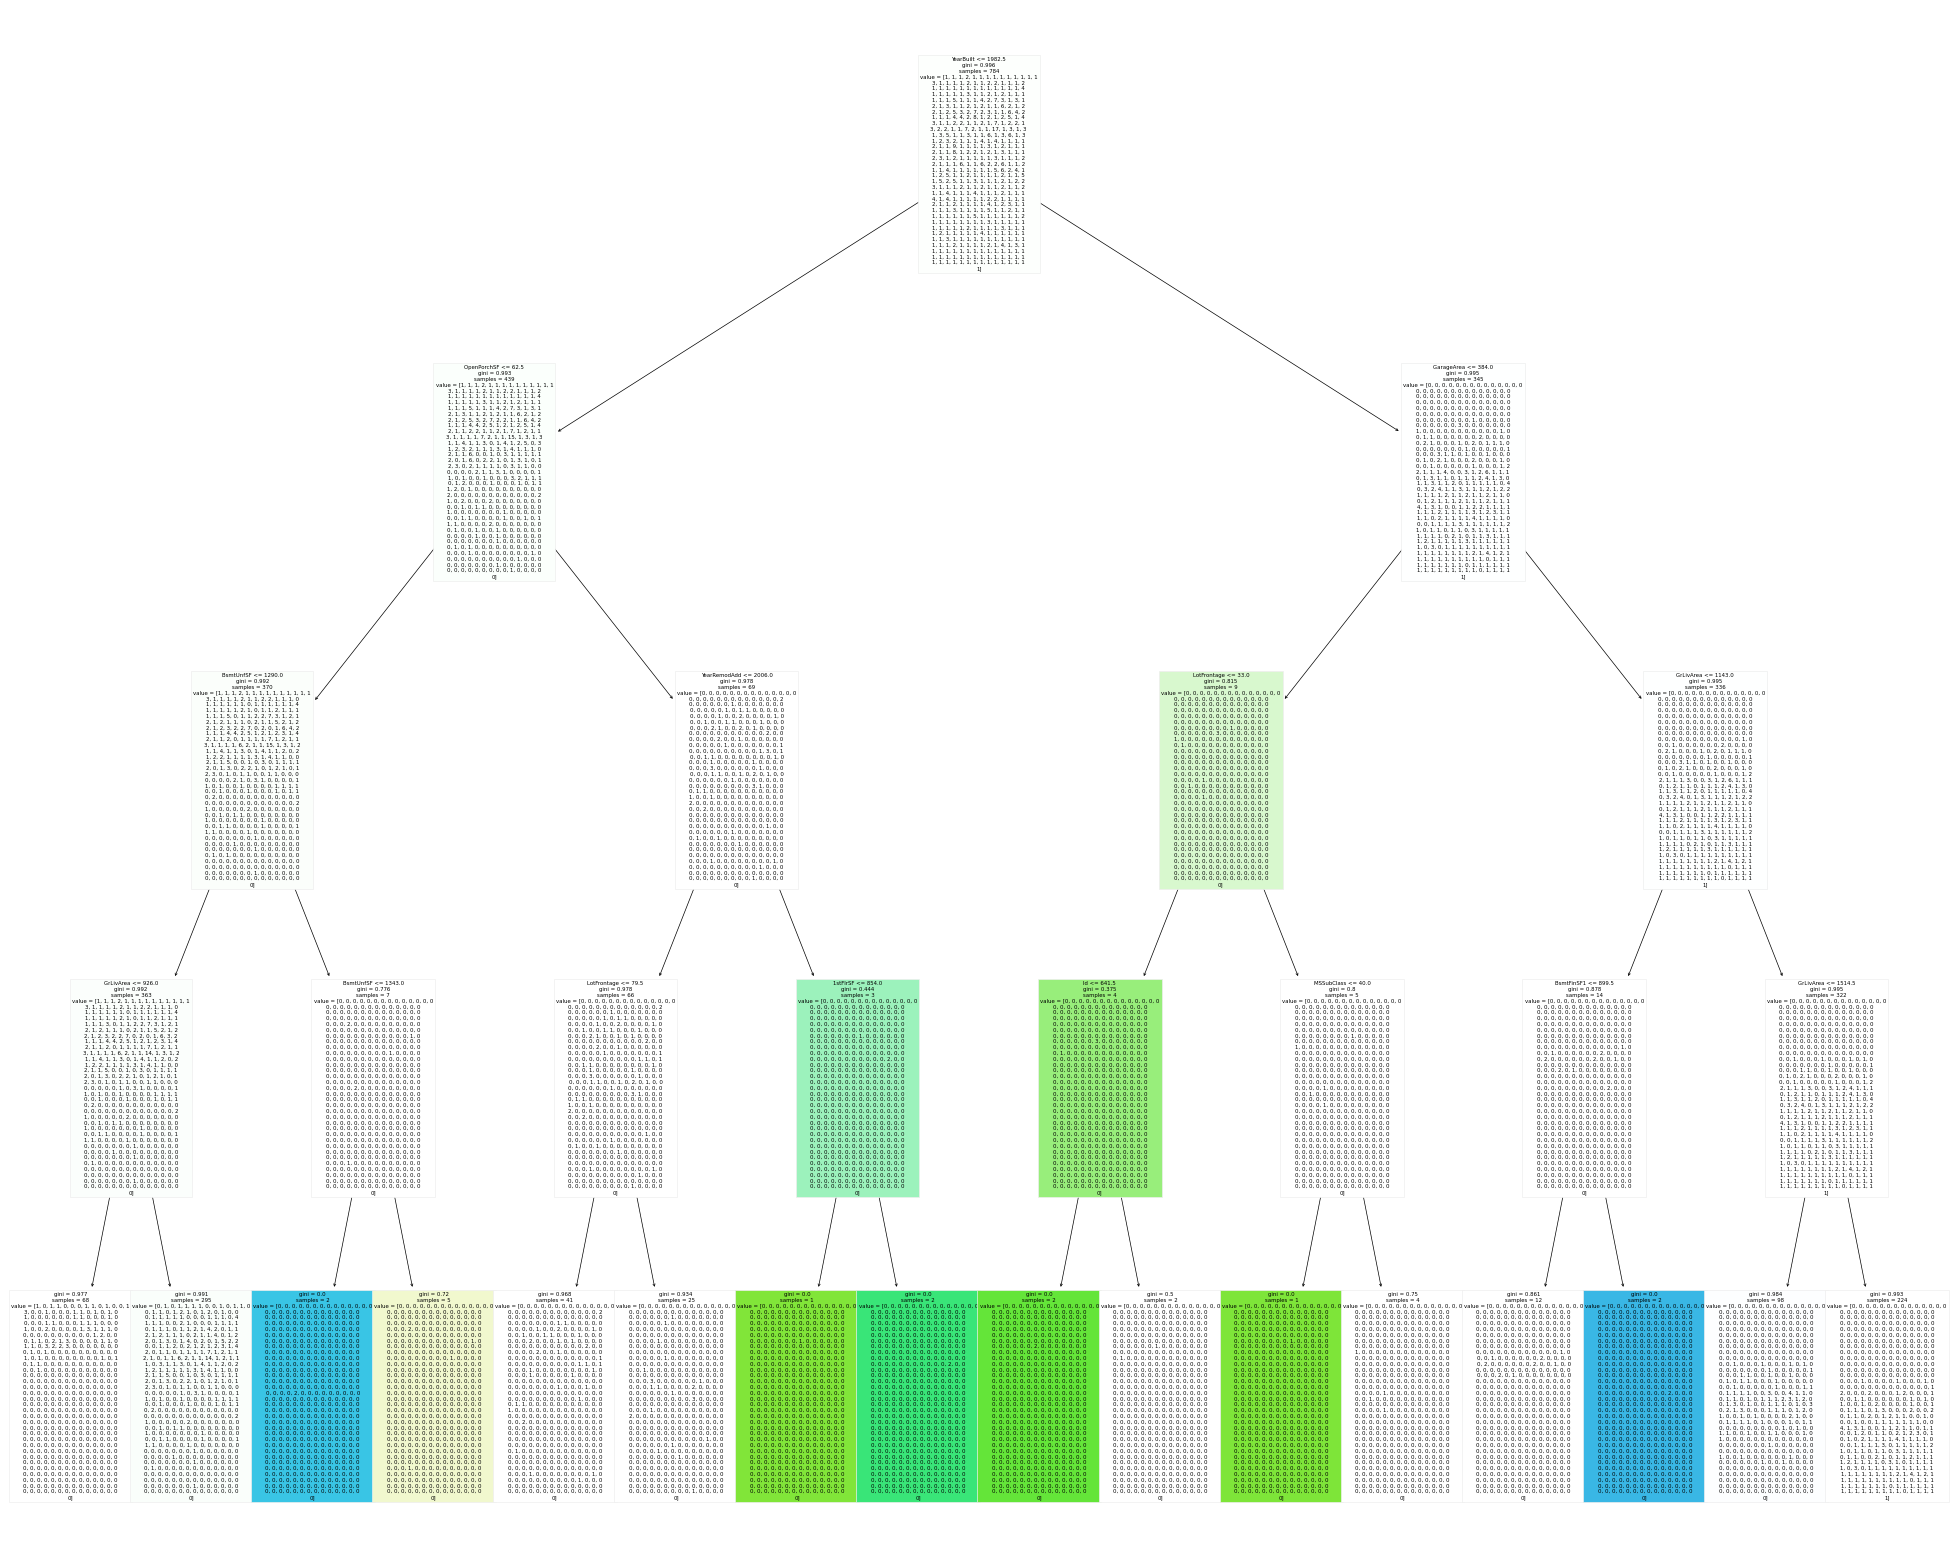

In [ ]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
arbol = arbol.fit(X_train, y_train) 

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

3. Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [ ]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))

Accuracy: 0.005934718100890208
Precision: 0.00016190947199849276
Recall:  0.005934718100890208


4. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

Accuracy: 0.01483679525222552
Precision: 0.0017243791680866213
Recall:  0.01483679525222552


[Text(0.5, 0.9, 'YearBuilt <= 1982.5\ngini = 0.996\nsamples = 784\nvalue = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4\n1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 5, 1, 1, 1, 4, 2, 7, 3, 1, 3, 1\n2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 6, 2, 1, 2\n2, 1, 2, 5, 3, 2, 7, 2, 3, 1, 1, 6, 4, 2\n1, 1, 1, 4, 4, 2, 8, 1, 2, 1, 2, 5, 1, 4\n3, 1, 1, 2, 2, 1, 1, 2, 1, 7, 1, 2, 2, 1\n3, 2, 2, 1, 1, 7, 2, 1, 1, 17, 1, 3, 1, 3\n1, 3, 5, 1, 1, 3, 1, 1, 6, 1, 3, 6, 1, 3\n1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1\n2, 1, 1, 9, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1\n2, 1, 1, 8, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1\n2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2\n2, 1, 1, 1, 6, 1, 1, 6, 2, 2, 6, 1, 1, 2\n1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 6, 2, 4, 1\n1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5\n1, 5, 2, 5, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2\n3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2\n1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1\n4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1\

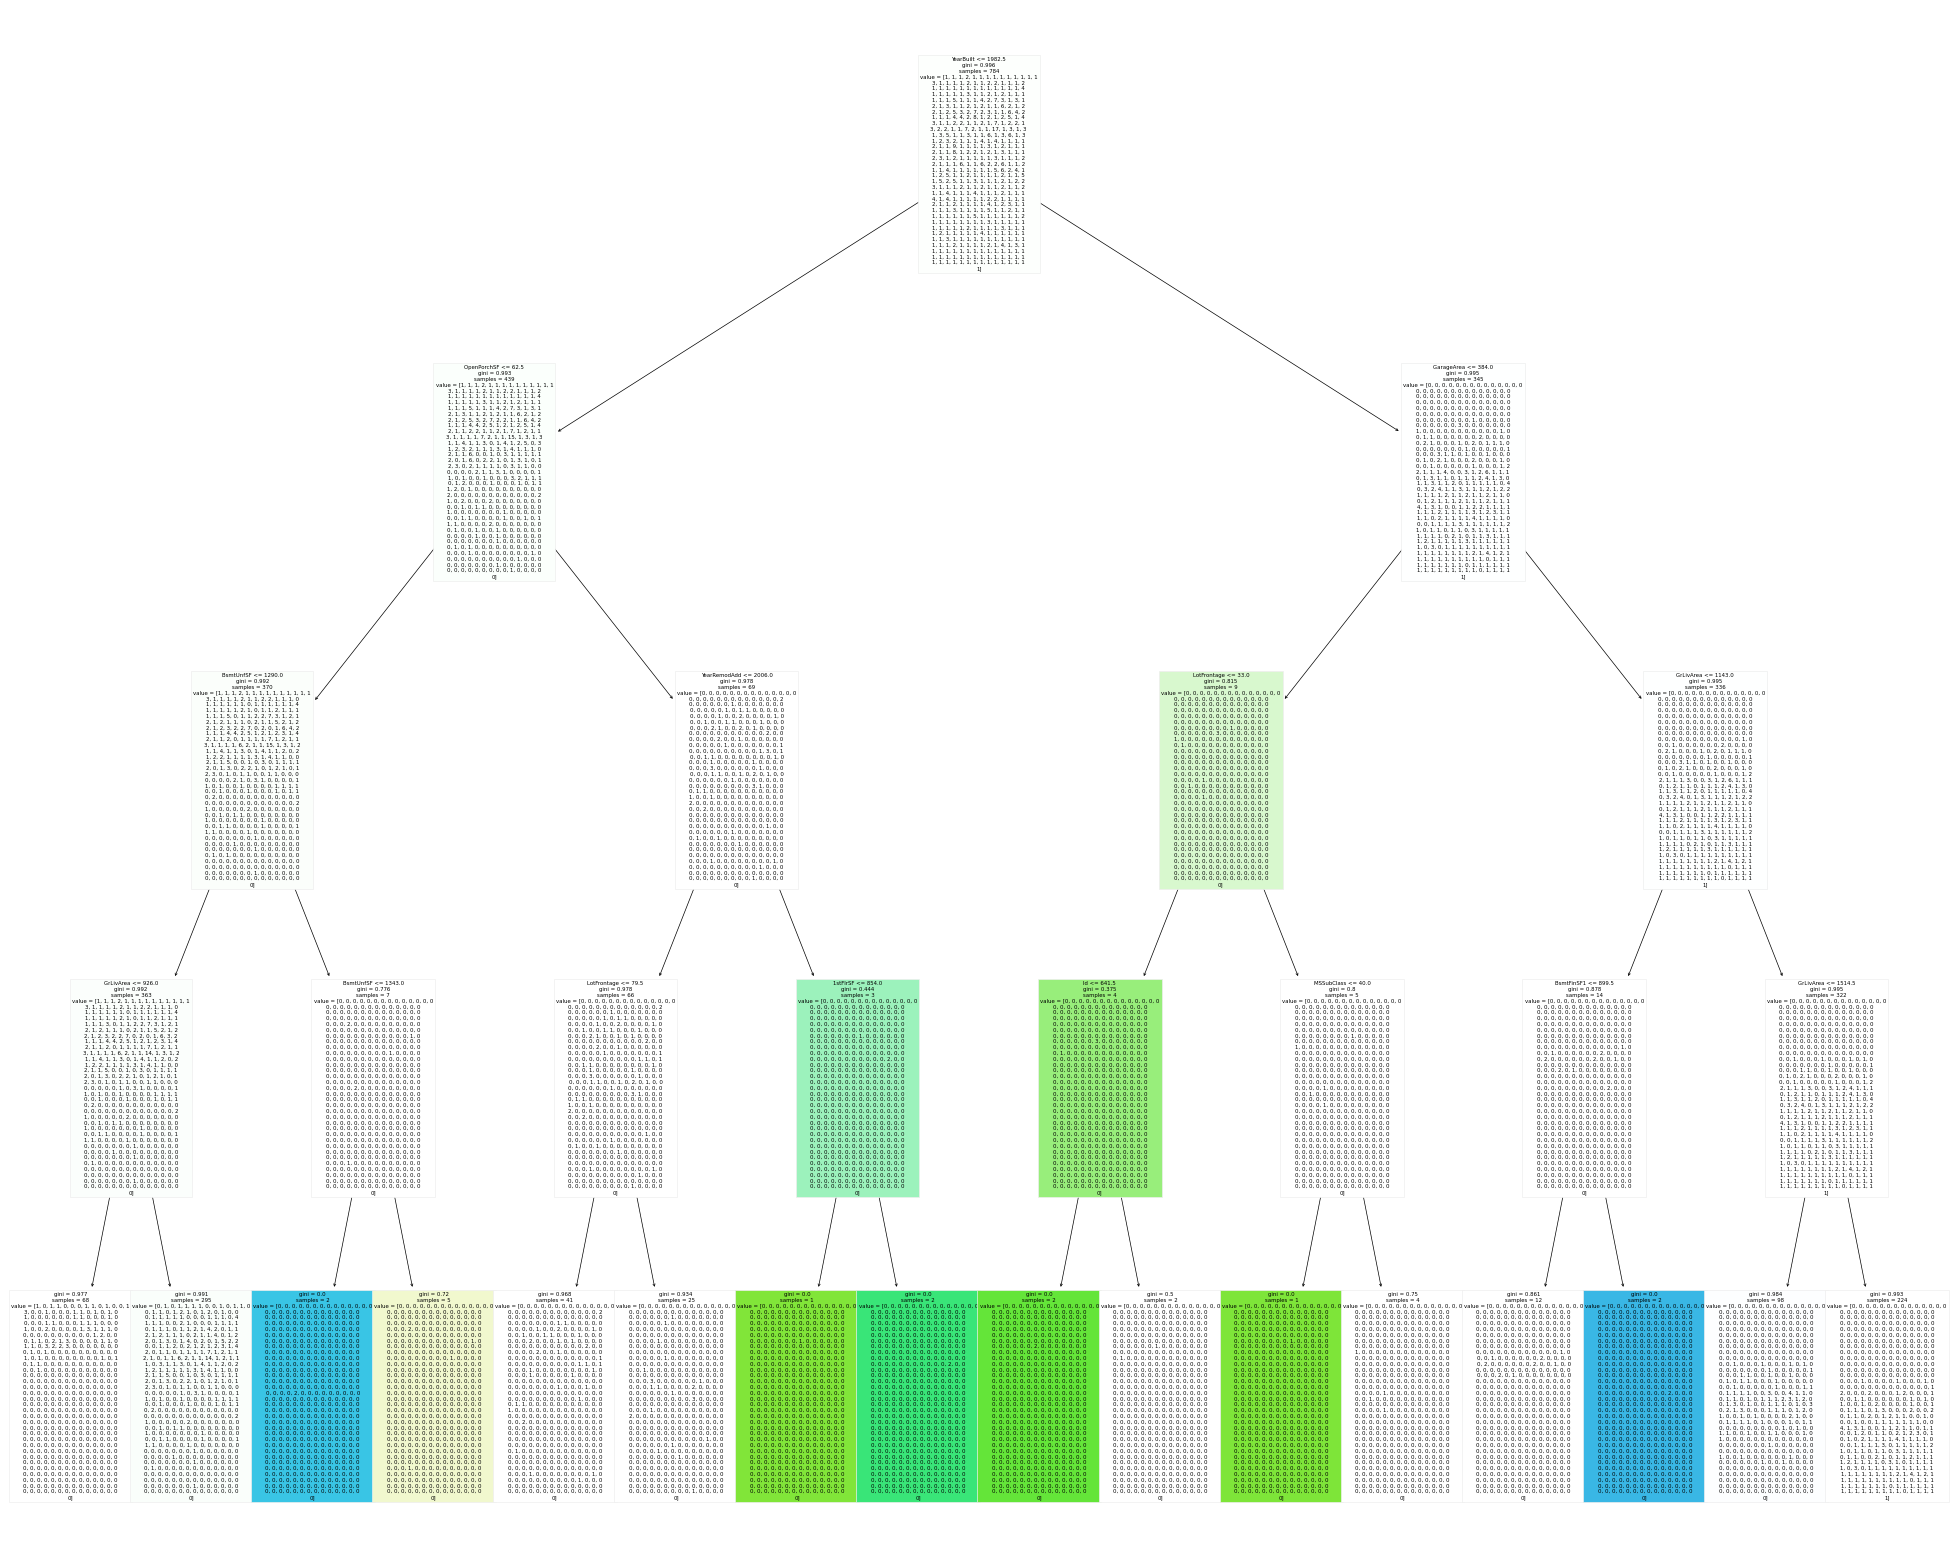

In [ ]:
model1 = DecisionTreeClassifier(max_depth=6, random_state=42)
model1 = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print ("Precision:", metrics.precision_score(y_test,y_pred1,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred1,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

Accuracy: 0.005934718100890208
Precision: 0.0023647918869447574
Recall:  0.005934718100890208


[Text(0.5, 0.9, 'YearBuilt <= 1982.5\ngini = 0.996\nsamples = 784\nvalue = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4\n1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 5, 1, 1, 1, 4, 2, 7, 3, 1, 3, 1\n2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 6, 2, 1, 2\n2, 1, 2, 5, 3, 2, 7, 2, 3, 1, 1, 6, 4, 2\n1, 1, 1, 4, 4, 2, 8, 1, 2, 1, 2, 5, 1, 4\n3, 1, 1, 2, 2, 1, 1, 2, 1, 7, 1, 2, 2, 1\n3, 2, 2, 1, 1, 7, 2, 1, 1, 17, 1, 3, 1, 3\n1, 3, 5, 1, 1, 3, 1, 1, 6, 1, 3, 6, 1, 3\n1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1\n2, 1, 1, 9, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1\n2, 1, 1, 8, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1\n2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2\n2, 1, 1, 1, 6, 1, 1, 6, 2, 2, 6, 1, 1, 2\n1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 6, 2, 4, 1\n1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5\n1, 5, 2, 5, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2\n3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2\n1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1\n4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1\

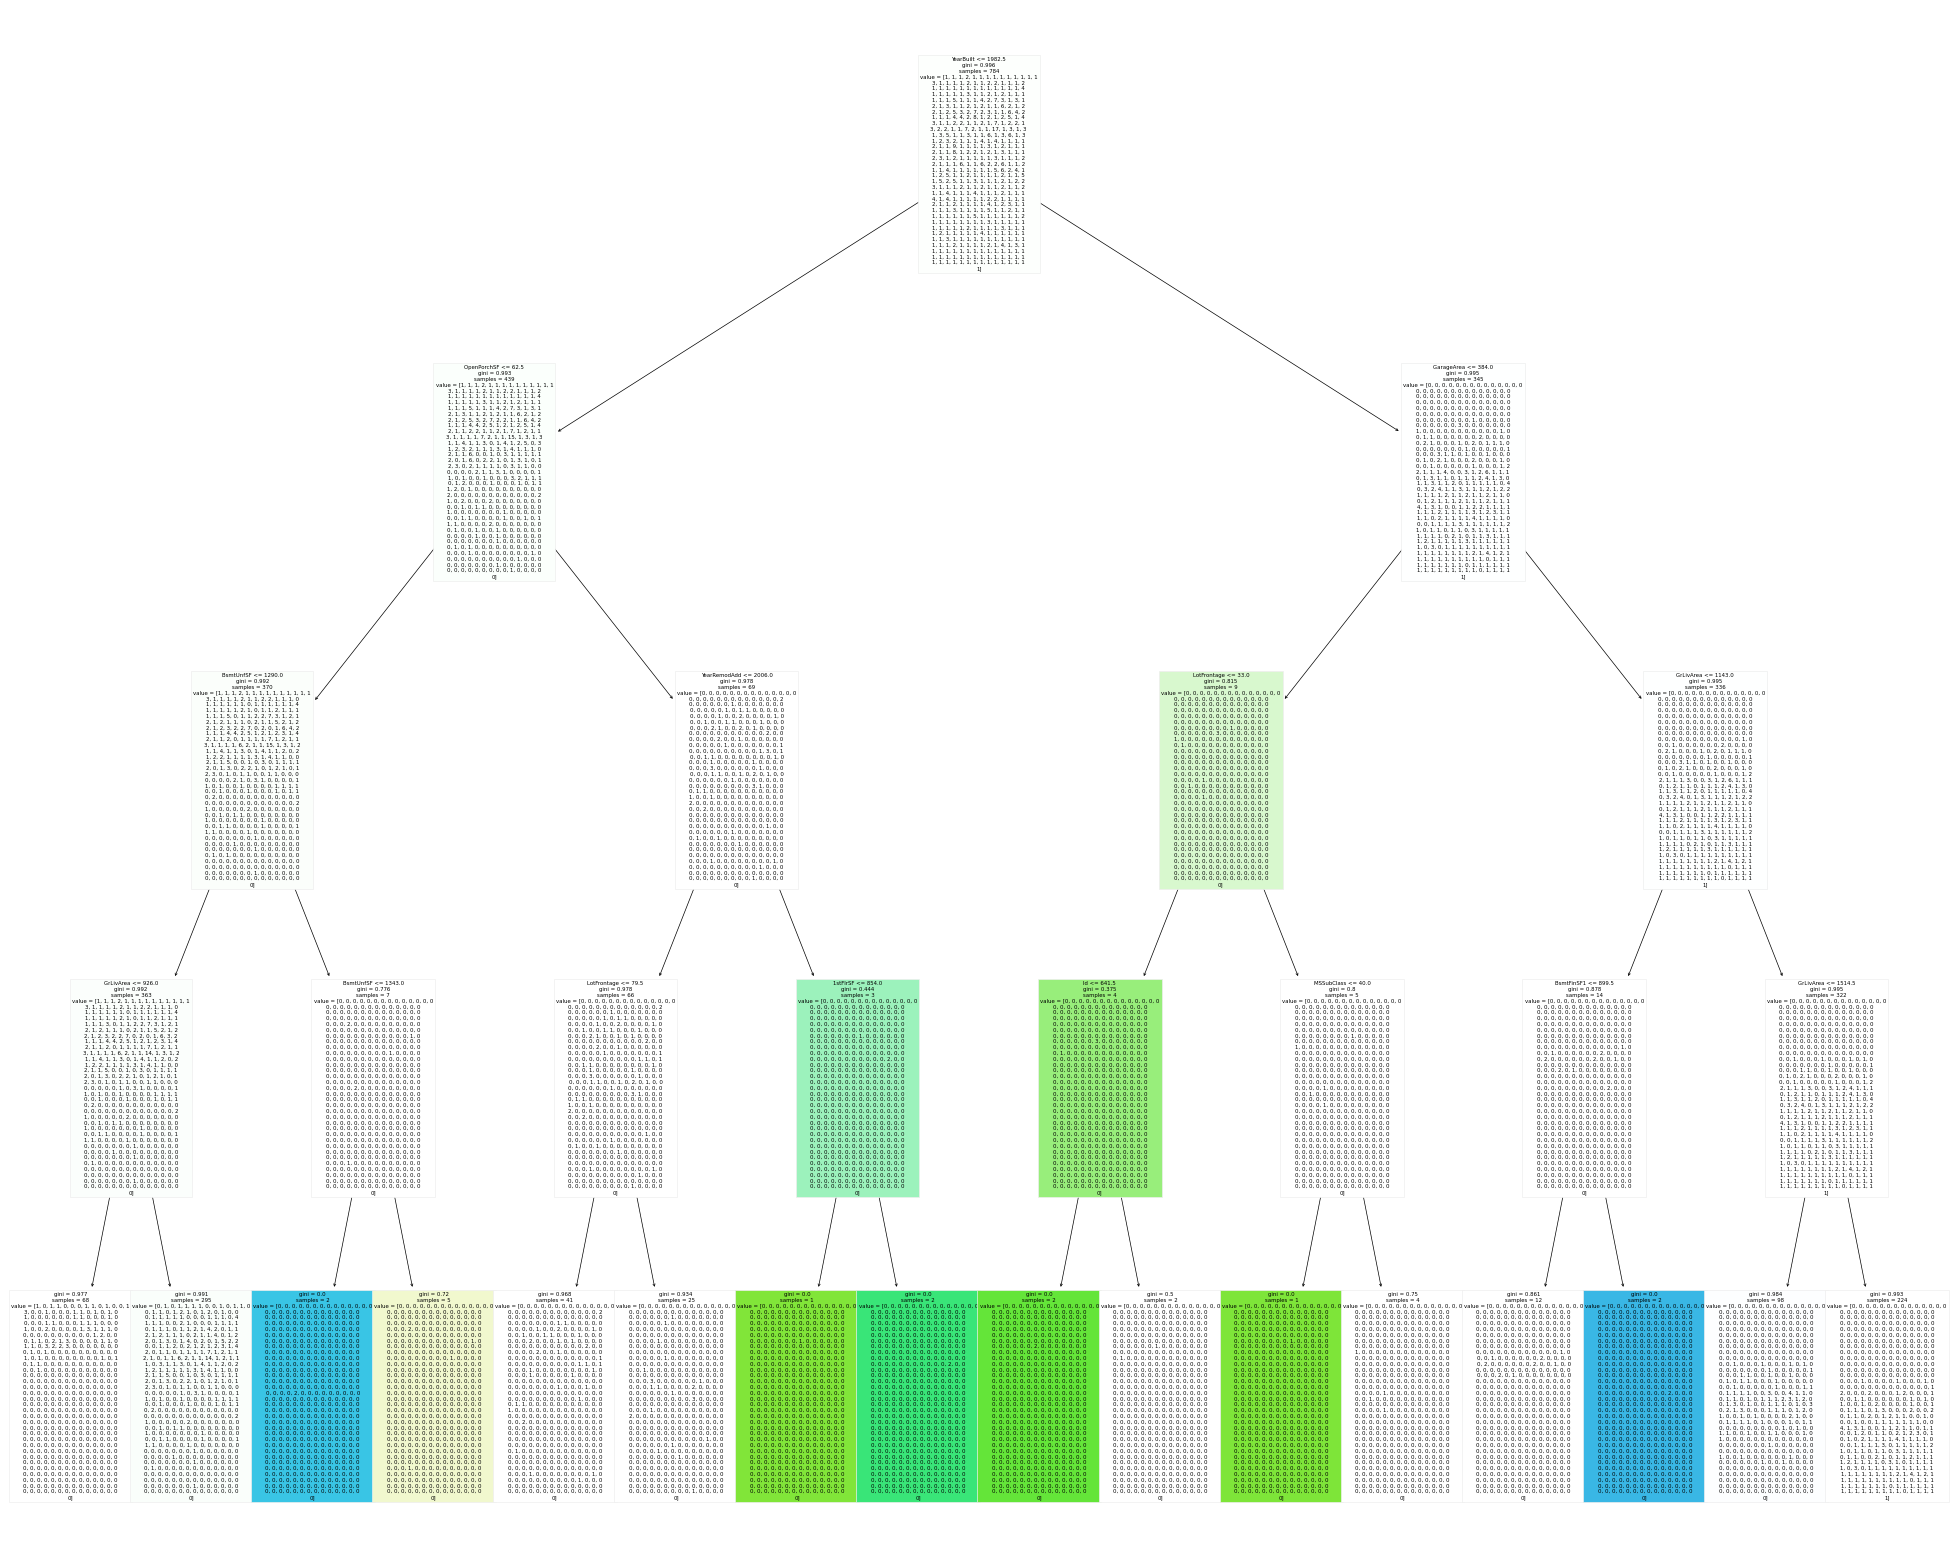

In [ ]:
model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
model2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print ("Precision:", metrics.precision_score(y_test,y_pred2,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred2,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

Accuracy: 0.002967359050445104
Precision: 1.831703117558706e-05
Recall:  0.002967359050445104


[Text(0.5, 0.9, 'YearBuilt <= 1982.5\ngini = 0.996\nsamples = 784\nvalue = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4\n1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 5, 1, 1, 1, 4, 2, 7, 3, 1, 3, 1\n2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 6, 2, 1, 2\n2, 1, 2, 5, 3, 2, 7, 2, 3, 1, 1, 6, 4, 2\n1, 1, 1, 4, 4, 2, 8, 1, 2, 1, 2, 5, 1, 4\n3, 1, 1, 2, 2, 1, 1, 2, 1, 7, 1, 2, 2, 1\n3, 2, 2, 1, 1, 7, 2, 1, 1, 17, 1, 3, 1, 3\n1, 3, 5, 1, 1, 3, 1, 1, 6, 1, 3, 6, 1, 3\n1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1\n2, 1, 1, 9, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1\n2, 1, 1, 8, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1\n2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2\n2, 1, 1, 1, 6, 1, 1, 6, 2, 2, 6, 1, 1, 2\n1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 6, 2, 4, 1\n1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5\n1, 5, 2, 5, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2\n3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2\n1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1\n4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1\

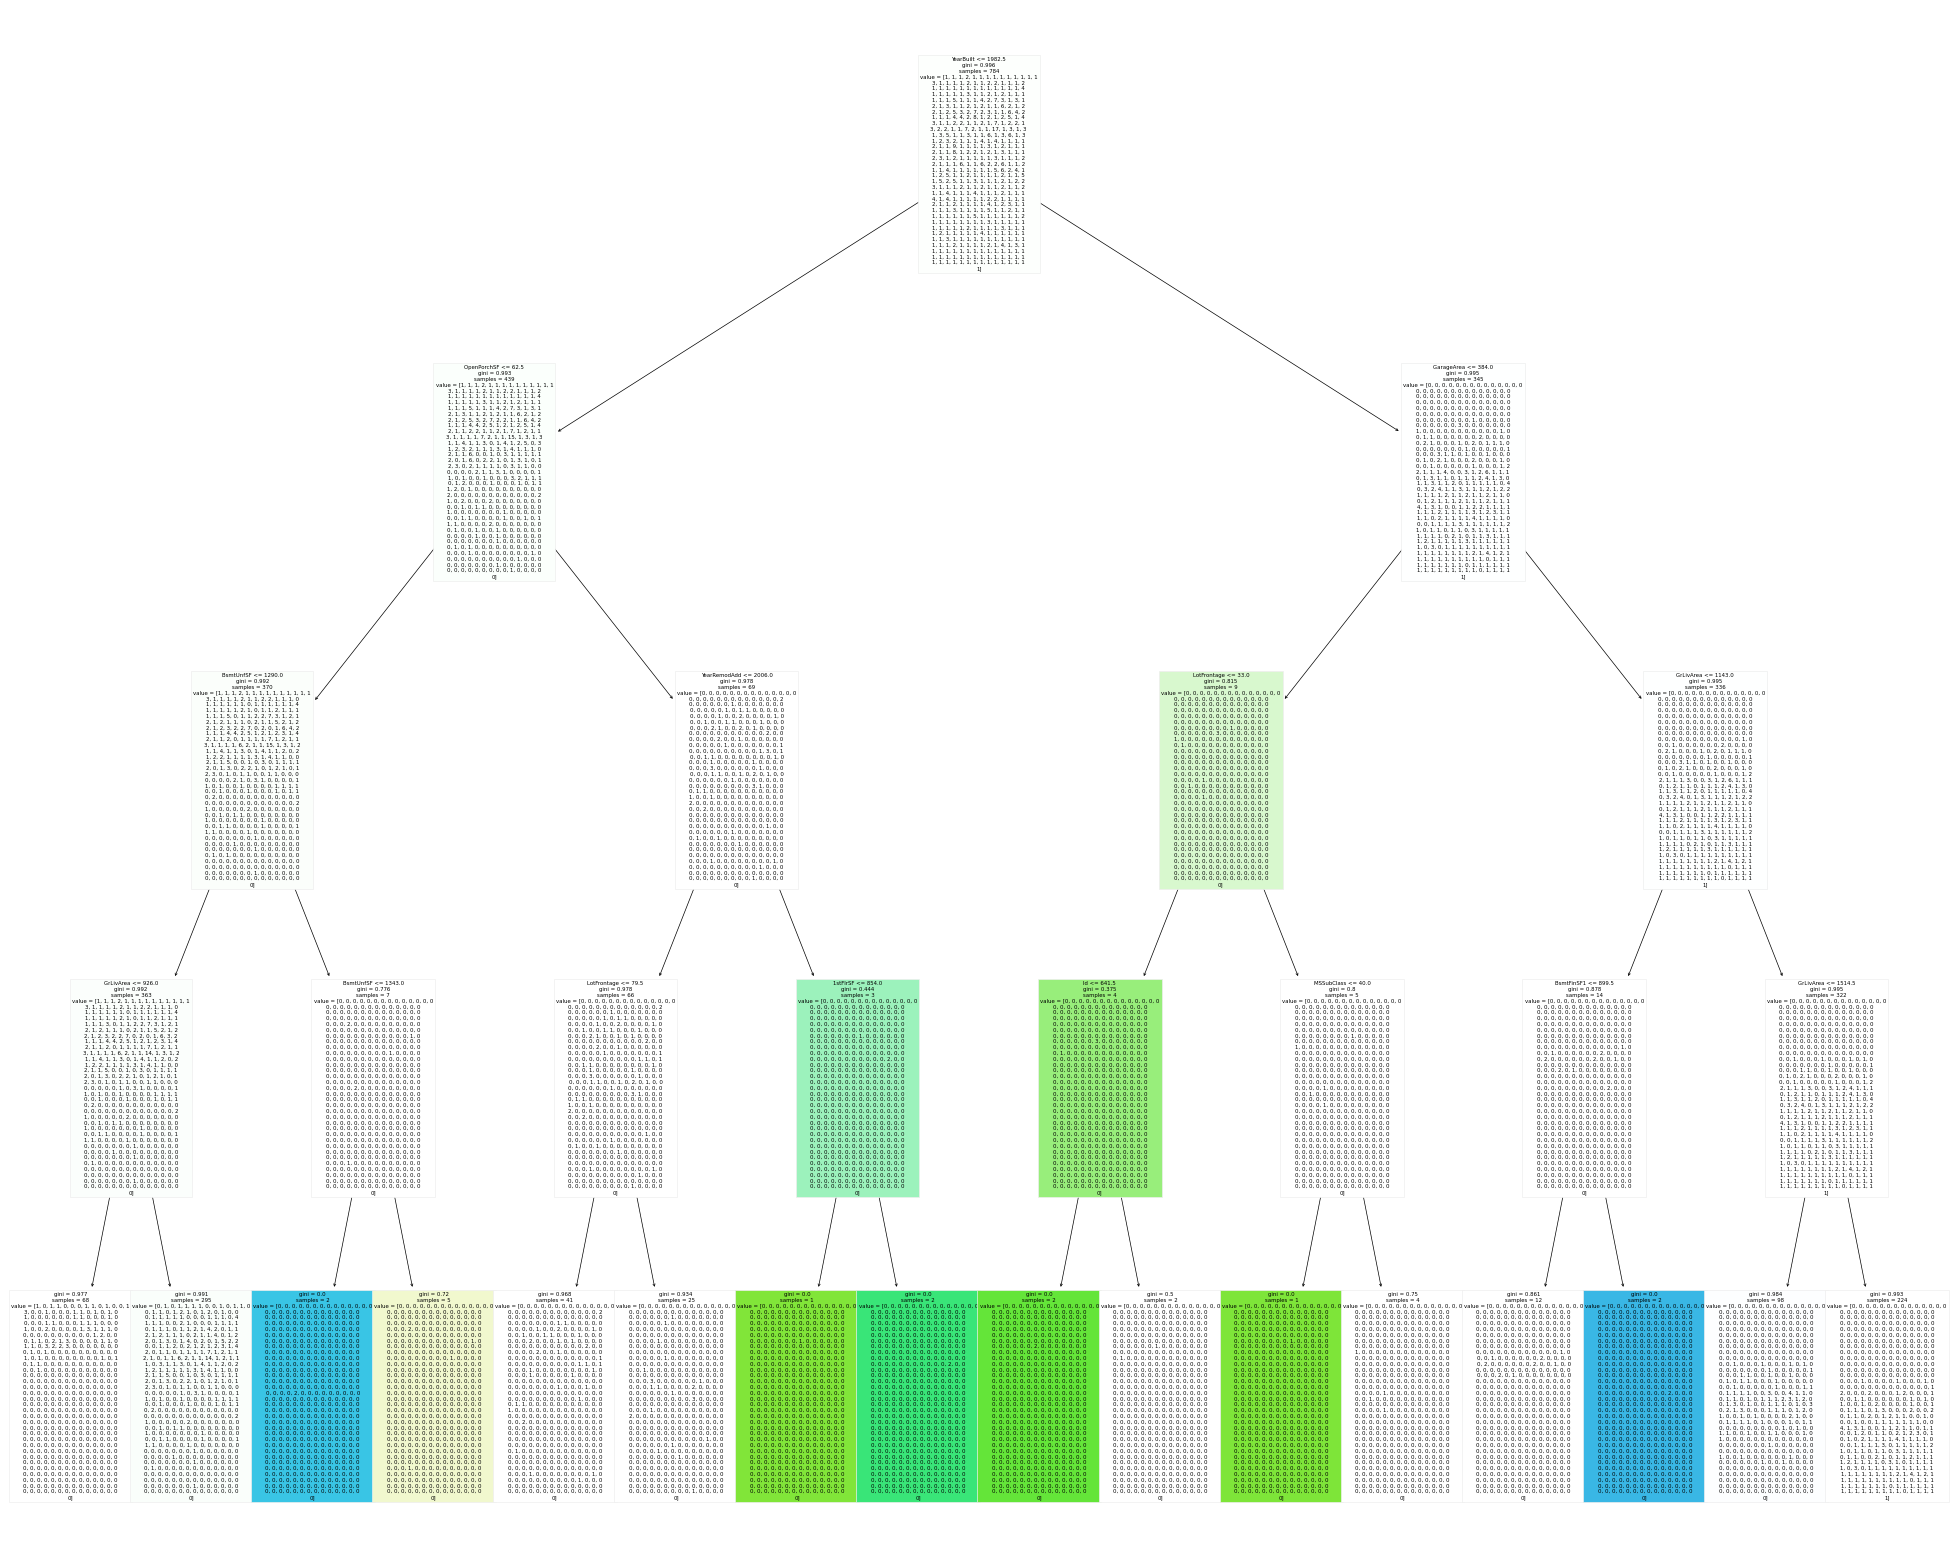

In [ ]:
model3 = DecisionTreeClassifier(max_depth=2, random_state=42)
model3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print ("Precision:", metrics.precision_score(y_test,y_pred3,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred3,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

El mejor modelo para predecir el precio de las casas es el modelo 3.

5. Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo mejor?

Se encontro que los resultados del modelo de regresion lineal de la hoja anterior fueron mejores, ya que el accuracy, la precision y el recll, todos fueron mejores que cualquiera de los modelos intentados en esta hoja.

6. Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados


[Text(0, 0, '487'), Text(0, 0, '490'), Text(0, 0, '483')]

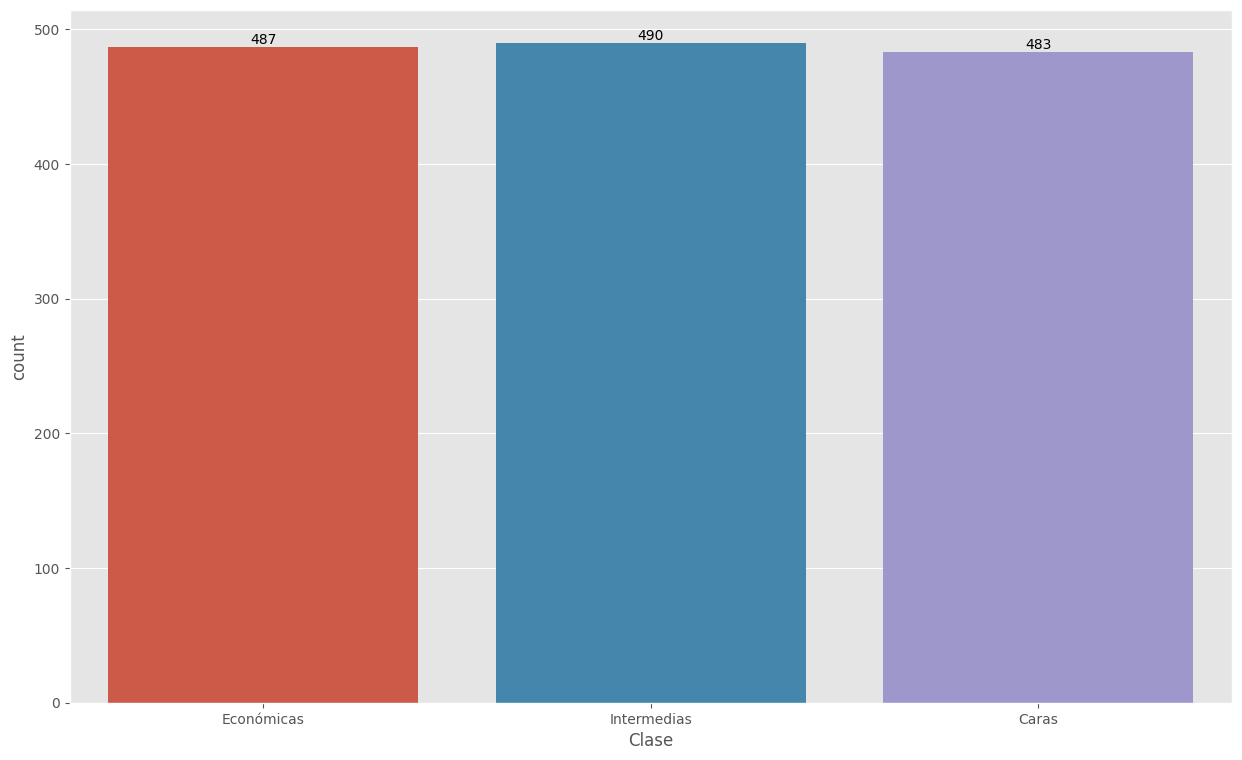

In [55]:
datos1 = pd.read_csv("train.csv", encoding="latin1")
numericas = datos1.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

ax = sb.countplot(data=numericas, x="Clase")
ax.bar_label(ax.containers[0])


7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las casas, no incluya el precio de venta para entrenar el modelo.

[Text(0.5445336391437309, 0.9642857142857143, 'OverallQual <= 6.5\ngini = 0.666\nsamples = 1021\nvalue = [331, 356, 334]\nclass = Intermedias'),
 Text(0.2798165137614679, 0.8928571428571429, 'GarageCars <= 1.5\ngini = 0.551\nsamples = 643\nvalue = [45, 347, 251]\nclass = Intermedias'),
 Text(0.16972477064220184, 0.8214285714285714, 'TotalBsmtSF <= 1087.0\ngini = 0.328\nsamples = 308\nvalue = [2, 245, 61]\nclass = Intermedias'),
 Text(0.11926605504587157, 0.75, 'GrLivArea <= 1342.0\ngini = 0.225\nsamples = 265\nvalue = [1, 231, 33]\nclass = Intermedias'),
 Text(0.07492354740061162, 0.6785714285714286, 'MiscVal <= 9500.0\ngini = 0.088\nsamples = 196\nvalue = [0, 187, 9]\nclass = Intermedias'),
 Text(0.06880733944954129, 0.6071428571428571, 'LotFrontage <= 125.0\ngini = 0.079\nsamples = 195\nvalue = [0, 187, 8]\nclass = Intermedias'),
 Text(0.06269113149847094, 0.5357142857142857, 'BsmtFinSF1 <= 736.0\ngini = 0.07\nsamples = 194\nvalue = [0, 187, 7]\nclass = Intermedias'),
 Text(0.0397553

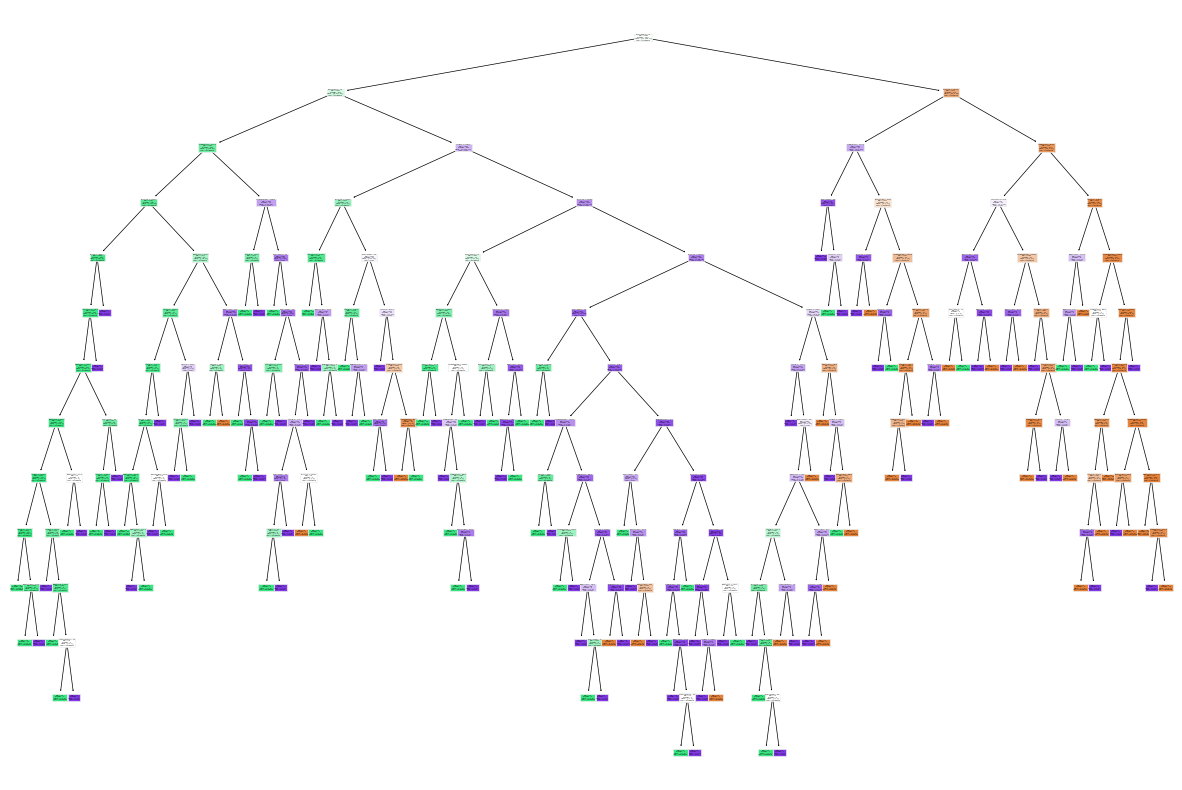

In [67]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

plt.figure(figsize=(15,10))
tree.plot_tree(arbol,feature_names=X.columns, class_names=["Económicas", "Intermedias", "Caras"], filled=True)

8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.

In [76]:
y_pred = arbol.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))

Accuracy: 0.7374429223744292
Precision: 0.7355148218052403
Recall:  0.7374429223744292


9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

In [78]:
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

[[124   1  27]
 [  1 103  26]
 [ 28  32  96]]
F1 Score:  0.7362406690429195


10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior?

In [83]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5, error_score='raise')
print("Precisión de cada pliegue: {}".format(scores))
print("Precisión promedio: {:.2f}".format(np.mean(scores)))

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

11. Haga al menos, 3 modelos más cambiando la profundidad del árbol. ¿Cuál funcionó mejor?

12. Repita los análisis usando random forest como algoritmo de predicción, explique sus resultados comparando ambos algoritmos.